In [1]:
import tsvalidation as tsv
from tsvalidation.data_generation import time_series_functions as tsf
from tsvalidation.data_generation import time_series_generation as tsg
from tsvalidation.data_generation import utils as dgu
import numpy as np
import matplotlib.pyplot as plt


In [8]:
generator = tsg.TimeSeriesGenerator([ tsf.linear_ts], parameter_values={'linear_ts': [(1, 2), [5, 30], [0,10]] })
generator.generate()

TypeError: unsupported operand type(s) for -: 'list' and 'tuple'

In [2]:
if __name__=='__main__':
    max_interval_size = 1
    samples = 1000

    ts_linear = tsg.generate_from_func(samples, tsf.linear_ts, param_possibilities= {'max_interval_size': (1, 2), 'slope':[5, 30], 'intercept': [0,10] }, nb_ts = 1)
    ts_exponential = tsg.generate_from_func(samples, tsf.exponential_ts,  param_possibilities = {'max_interval_size': (1, 2), 
                    'decay_rate': [1, 25], 
                    'initial_value': [1, 25]}, nb_ts = 2)
    ts_impulse = tsg.generate_from_func(samples, tsf.scaled_unit_impulse_function_ts, param_possibilities = {'idx': (500, 600), 
                                                'constant': [5, 10]}, nb_ts = 2)
    
    ts_indicator = tsg.generate_from_func(samples, tsf.scaled_right_indicator_ts, param_possibilities = {'idx': (700, 600), 
                                                'constant': [5, 10]}, nb_ts = 1)
    
    
    
    ts_sin= tsg. (samples, tsf.frequency_varying_sinusoid_ts, param_possibilities = {
        'max_interval_size': (1, 2), 'amplitude':[1,3],
        'frequency':(dgu.FrequencyModulationLinear(1,20), dgu.FrequencyModulationWithStep(10,0.8))}, nb_ts = 1)

    time_series = tsg.linear_combination([0.2, 0.05, 0.05, 0.1, 0.1, 0.2, 0.3], ts_linear + ts_exponential + ts_impulse + ts_indicator + ts_sin)
    
    
    
    # Plot
    plt.scatter(np.arange(0, max_interval_size, max_interval_size/samples), time_series)
    plt.show()

TypeError: linear_ts() missing 1 required positional argument: 'max_interval_size'

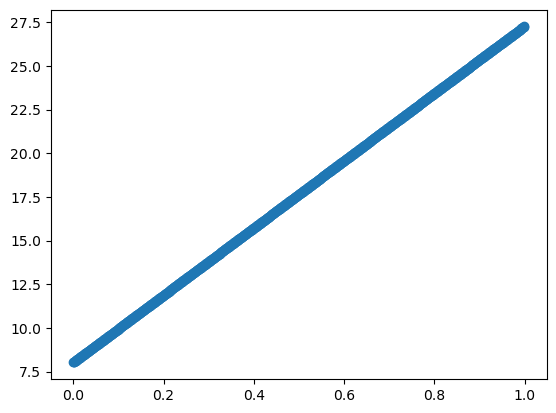

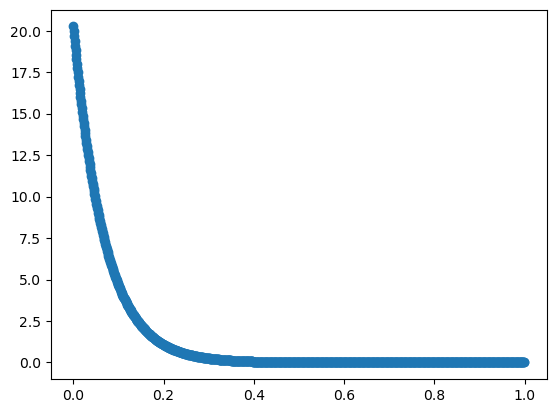

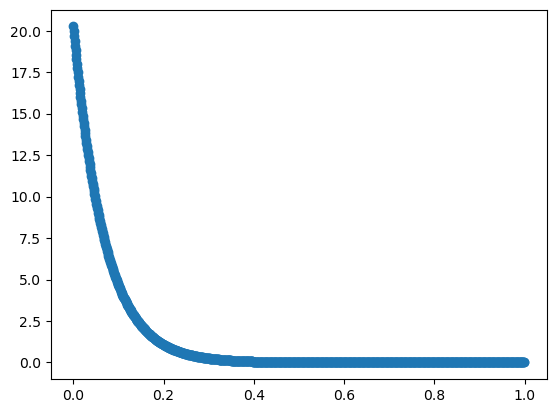

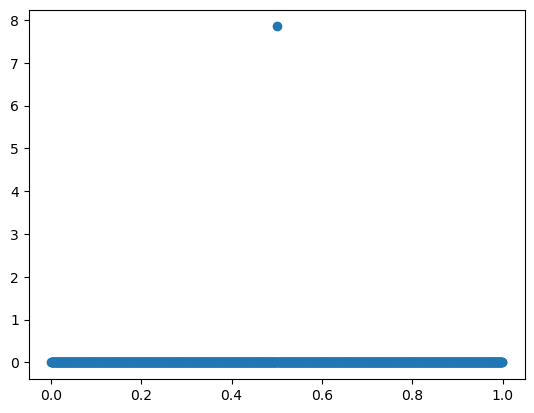

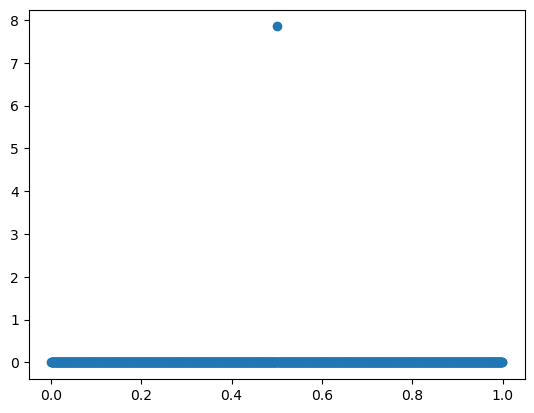

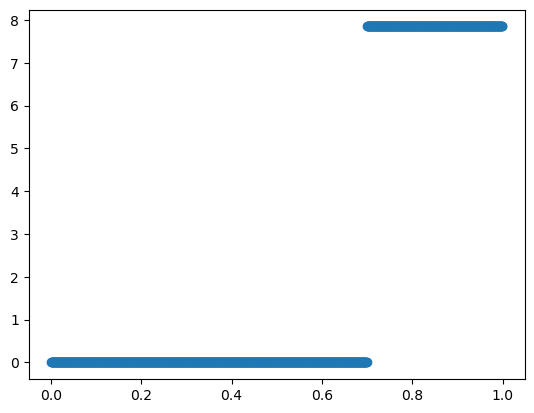

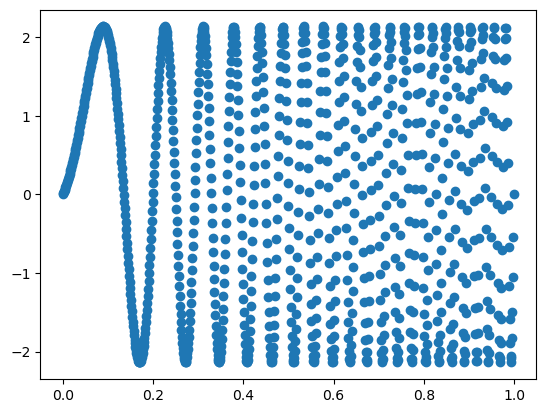

In [ ]:
# Plot
for ts in ts_linear + ts_exponential + ts_impulse + ts_indicator +ts_sin:
    plt.scatter(np.arange(0, max_interval_size, max_interval_size/samples), ts)
    plt.show()

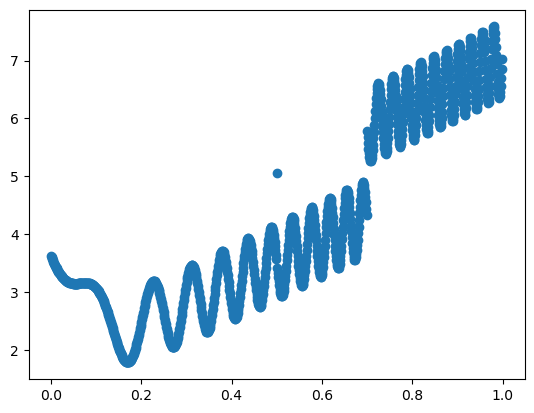

In [ ]:
plt.scatter(np.arange(0, max_interval_size, max_interval_size/samples), time_series)
plt.show()